refrence code is [here](https://dataflowr.github.io/website/modules/extras/GCN_inductivebias_spectral/).

In [1]:

import torch
def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)
!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 

Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 8.0 MB 2.1 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 2.9 MB 2.1 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 1.4 MB 2.0 MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
     |████████████████████████████████| 677 kB 2.1 MB/s 
     |████████████████████████████████| 308 kB 5.2 MB/s 
     |████████████████████████████████| 379 kB 39.9 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.1-py3-none-any.whl size=513822 sha256=6a75b7ef21c144174c1bf18da9eb46a6d4d4561eb8b5d7a2d4782a14366e39ec
  Stored in directory: /root/.cache/pip/wheels/78/3d/42/20589db73c66b5109fb93a0c5743edfd6ab5ca820a52afacfc
Successfully built torch-

#read karate club dataset

> Indented block



In [2]:
from torch_geometric.datasets import KarateClub
import torch_geometric
import networkx as nx
dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('********************')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')


Dataset: KarateClub():
********************
Number of graphs: 1
Number of features: 34
Number of classes: 4


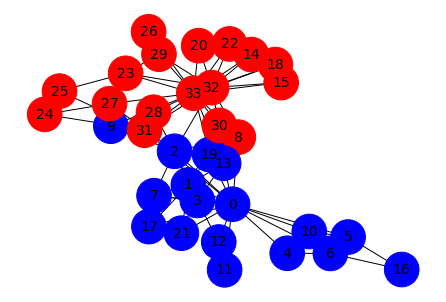

In [3]:
#convert dataset in 2 classes label 1 and 3 in one class
data = dataset[0] 
biclasses = [int(b) for b in ((data.y == 1) + (data.y==3))]
G= torch_geometric.utils.to_networkx(data, to_undirected=True)
color_map = []
for node in biclasses:
    if node==1:
        color_map.append("blue")
    else: 
        color_map.append('red')
nx.draw(G, with_labels =True,node_size=1200,font_size=14,node_color=color_map)

In [ ]:
data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [ ]:
color_map

In [ ]:
(data.y == data.y[0]) + (data.y==data.y[5])

tensor([ True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True, False, False,  True,  True, False,  True,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False])